In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mltpt
import nltk
%matplotlib inline

In [2]:
data = pd.read_csv('realdata.csv', names=['reviews','liked'])

In [3]:
data = data.iloc[1:]

In [4]:
data.head()

,reviews,liked
1,Food was good in taste unlike other hotels. Th...,1
2,"They serves good, pure and fresh food with qua...",1
3,The property is located on the main road and i...,1
4,I am regular guest of this hotel but my recent...,1
5,It was a awesome experience to have a dinner a...,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 1 to 1020
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1020 non-null   object
 1   liked    1020 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ KB


In [6]:
data.liked.value_counts()

1    624
0    396
Name: liked, dtype: int64

#tokenization is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation.

In [7]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation from either side of the word
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)
data["review_clean"] = data["reviews"].apply(lambda x: clean_text(x))
data['review_clean']
data.head(10)

,reviews,liked,review_clean
1,Food was good in taste unlike other hotels. Th...,1,food good taste unlike hotels serve fast order...
2,"They serves good, pure and fresh food with qua...",1,serves good pure fresh food quality centric ap...
3,The property is located on the main road and i...,1,property located main road well known locality...
4,I am regular guest of this hotel but my recent...,1,regular guest hotel recent visit comfort nice ...
5,It was a awesome experience to have a dinner a...,1,awesome experience dinner restaurant reasonabl...
6,I would recommend this restaurant for family a...,1,would recommend restaurant family well busines...
7,Taste-wise the food is certainly above average.,1,taste-wise food certainly average.
8,Food quality is good with reasonable price. Se...,1,food quality good reasonable price seating arr...
9,good service,1,good service
10,not recommend,0,recommend


In [11]:
#tokenize a collection of text documents and build a vocabulary of known words
#An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.
from sklearn.feature_extraction.text import CountVectorizer
# create the transform
wordvector = CountVectorizer()
# tokenize and build vocab
finalwordvector = wordvector.fit(data['review_clean'])
# summarize
print(wordvector.vocabulary_)
# encode document
#bag of words - focuses on the occurrence of words in a document. Assigns each word a unique number.
bagofwords = finalwordvector.transform(data['review_clean'])
print(bagofwords)

{'food': 511, 'good': 561, 'taste': 1326, 'unlike': 1417, 'hotels': 620, 'serve': 1181, 'fast': 478, 'order': 910, 'cleaning': 224, 'great': 570, 'front': 531, 'side': 1200, 'parking': 948, 'available': 79, 'serves': 1185, 'pure': 1039, 'fresh': 524, 'quality': 1043, 'centric': 186, 'approach': 50, 'restaurant': 1104, 'items': 671, 'property': 1028, 'located': 733, 'main': 758, 'road': 1118, 'well': 1493, 'known': 698, 'locality': 732, 'consistent': 261, 'service': 1186, 'also': 22, 'rates': 1054, 'cheap': 200, 'worth': 1526, 'trying': 1393, 'regular': 1081, 'guest': 579, 'hotel': 619, 'recent': 1067, 'visit': 1458, 'comfort': 237, 'nice': 869, 'awesome': 84, 'experience': 459, 'dinner': 369, 'reasonable': 1062, 'serving': 1188, 'would': 1529, 'recommend': 1071, 'family': 474, 'business': 157, 'lunch': 753, 'wise': 1509, 'certainly': 187, 'average': 81, 'price': 1012, 'seating': 1170, 'arrangement': 57, 'pretty': 1011, 'tasteless': 1328, 'delicious': 344, 'money': 832, 'timely': 1364, 

In [12]:
#Term Frequency – Inverse Document Frequency
#Term Frequency: This summarizes how often a given word appears within a document.
#Inverse Document Frequency: This downscales words that appear a lot across documents.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit(bagofwords)
feature = tfidf.transform(bagofwords)
print(feature)

  (0, 1417)	0.35713379896917186
  (0, 1326)	0.15933464812040873
  (0, 1200)	0.3371203260744931
  (0, 1181)	0.26108504102472796
  (0, 948)	0.28289359528720465
  (0, 910)	0.26108504102472796
  (0, 620)	0.3229205410765622
  (0, 570)	0.16979111894433416
  (0, 561)	0.10997716667318812
  (0, 531)	0.35713379896917186
  (0, 511)	0.08600014503272962
  (0, 478)	0.2729886307314956
  (0, 224)	0.3229205410765622
  (0, 79)	0.24107156813004918
  (1, 1326)	0.17882551987470954
  (1, 1185)	0.36242232507144284
  (1, 1104)	0.1887245543531365
  (1, 1043)	0.16914668013888517
  (1, 1039)	0.350060784993794
  (1, 671)	0.29712807440102046
  (1, 561)	0.3702909110481424
  (1, 524)	0.3063824120260001
  (1, 511)	0.09652025360583476
  (1, 186)	0.40082077576265673
  (1, 50)	0.40082077576265673
  :	:
  (1016, 1428)	0.27548042004696244
  (1016, 1398)	0.3557080431298029
  (1016, 1359)	0.3407253282241409
  (1016, 1277)	0.32910383167454926
  (1016, 1044)	0.2569045006179799
  (1016, 899)	0.21703831656804487
  (1016, 845)	0

In [13]:
data.head()

,reviews,liked,review_clean
1,Food was good in taste unlike other hotels. Th...,1,food good taste unlike hotels serve fast order...
2,"They serves good, pure and fresh food with qua...",1,serves good pure fresh food quality centric ap...
3,The property is located on the main road and i...,1,property located main road well known locality...
4,I am regular guest of this hotel but my recent...,1,regular guest hotel recent visit comfort nice ...
5,It was a awesome experience to have a dinner a...,1,awesome experience dinner restaurant reasonabl...


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
x_train,x_test,y_train,y_test=train_test_split(feature,data['liked'],test_size=0.1,random_state=71)
mnb = MultinomialNB().fit(feature,data['liked'])
mnb.fit(x_train,y_train)
print("Training score=",mnb.score(x_train,y_train)," Testing score=",mnb.score(x_test,y_test))

Training score= 0.9368191721132898  Testing score= 0.9019607843137255


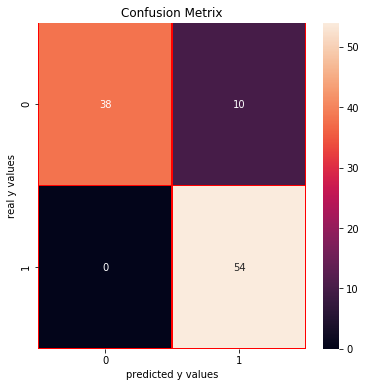

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,mnb.predict(x_test))

import seaborn as sns
f, ax = mltpt.subplots(figsize =(6,6))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
mltpt.title("Confusion Metrix")
mltpt.xlabel("predicted y values")
mltpt.ylabel("real y values")
mltpt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(feature,data['liked'],test_size=0.1,random_state=96)
model = SVC(kernel='sigmoid',gamma='auto')
model.fit(x_train,y_train)
print("Training score=",model.score(x_train,y_train)," Testing score=",model.score(x_test,y_test))

Training score= 0.6241830065359477  Testing score= 0.5


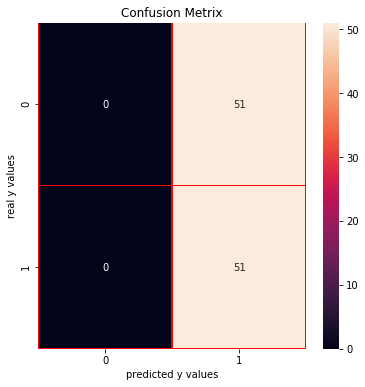

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(x_test))

import seaborn as sns
f, ax = mltpt.subplots(figsize =(6,6))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
mltpt.title("Confusion Metrix")
mltpt.xlabel("predicted y values")
mltpt.ylabel("real y values")
mltpt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(feature,data['liked'],test_size=0.2,random_state=6)
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("Training score=",lr.score(x_train,y_train)," Testing score=",lr.score(x_test,y_test))

Training score= 0.9522058823529411  Testing score= 0.8823529411764706


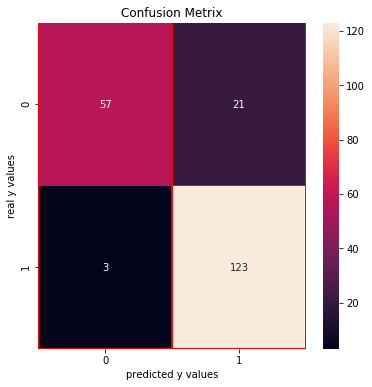

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr.predict(x_test))

import seaborn as sns
f, ax = mltpt.subplots(figsize =(6,6))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
mltpt.title("Confusion Metrix")
mltpt.xlabel("predicted y values")
mltpt.ylabel("real y values")
mltpt.show()

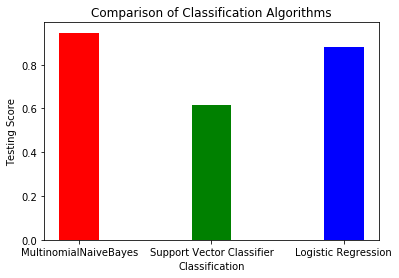

In [20]:
y = np.array([mnb.score(x_test,y_test),model.score(x_test,y_test),lr.score(x_test,y_test)])
x = ["MultinomialNaiveBayes", "Support Vector Classifier", "Logistic Regression"]
mltpt.bar(x,y,width=0.3,color=['red','green','blue'])
mltpt.title("Comparison of Classification Algorithms")
mltpt.xlabel("Classification")
mltpt.ylabel("Testing Score")
mltpt.show()

In [21]:
import pickle
pickle.dump(mnb,open('RestReviewmodel','wb'))

In [22]:
import pickle
model=pickle.load(open('RestReviewmodel','rb'))

In [23]:
a=input("Enter your review")

Enter your reviewAmazing food. Very very filling


In [24]:
l1 = clean_text(a)
l=[l1]
l2 = finalwordvector.transform(l)
l3 = tfidf.transform(l2)
review_rate = model.predict(l3[0])
print(review_rate)

[1]
